Assigment - 3

siraparapu lakshmi praveen

21bec7266

VIT-AP

In [ ]:
#Task-1
#Download dataset penguins size

In [1]:
#Task-2
import pandas as pd
df=pd.read_csv('penguins_size.csv')

Summary Statistics for culmen_length_mm:
count    342.000000
mean      43.921930
std        5.459584
min       32.100000
25%       39.225000
50%       44.450000
75%       48.500000
max       59.600000
Name: culmen_length_mm, dtype: float64



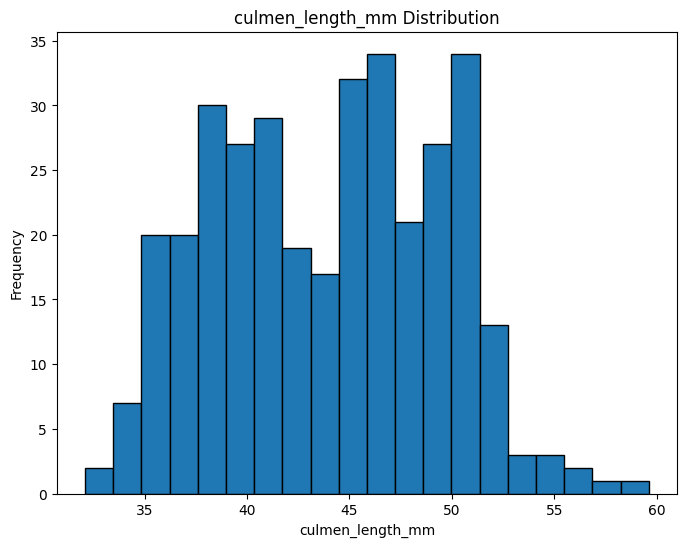

In [3]:
#Task-3
import matplotlib.pyplot as plt
#univariate
numerical_vars=['culmen_length_mm']
for var in numerical_vars:
  summary_stats=df[var].describe()
  print(f"Summary Statistics for {var}:\n{summary_stats}\n")
  plt.figure(figsize=(8, 6))
  plt.hist(df[var], bins=20, edgecolor='k')
  plt.xlabel(var)
  plt.ylabel('Frequency')
  plt.title(f'{var} Distribution')
  plt.show()

In [4]:
#Bi-variate
categorical_vars=['species','island','sex']
for var1 in categorical_vars:
  for var2 in categorical_vars:
    if var1 != var2:
      cross_tab=pd.crosstab(df[var1],df[var2])
      print(f"Cross-tabulation between {var1} and {var2}:\n{cross_tab}\n")

Cross-tabulation between species and island:
island     Biscoe  Dream  Torgersen
species                            
Adelie         44     56         52
Chinstrap       0     68          0
Gentoo        124      0          0

Cross-tabulation between species and sex:
sex        .  FEMALE  MALE
species                   
Adelie     0      73    73
Chinstrap  0      34    34
Gentoo     1      58    61

Cross-tabulation between island and species:
species    Adelie  Chinstrap  Gentoo
island                              
Biscoe         44          0     124
Dream          56         68       0
Torgersen      52          0       0

Cross-tabulation between island and sex:
sex        .  FEMALE  MALE
island                    
Biscoe     1      80    83
Dream      0      61    62
Torgersen  0      24    23

Cross-tabulation between sex and species:
species  Adelie  Chinstrap  Gentoo
sex                               
.             0          0       1
FEMALE       73         34      58
MALE  

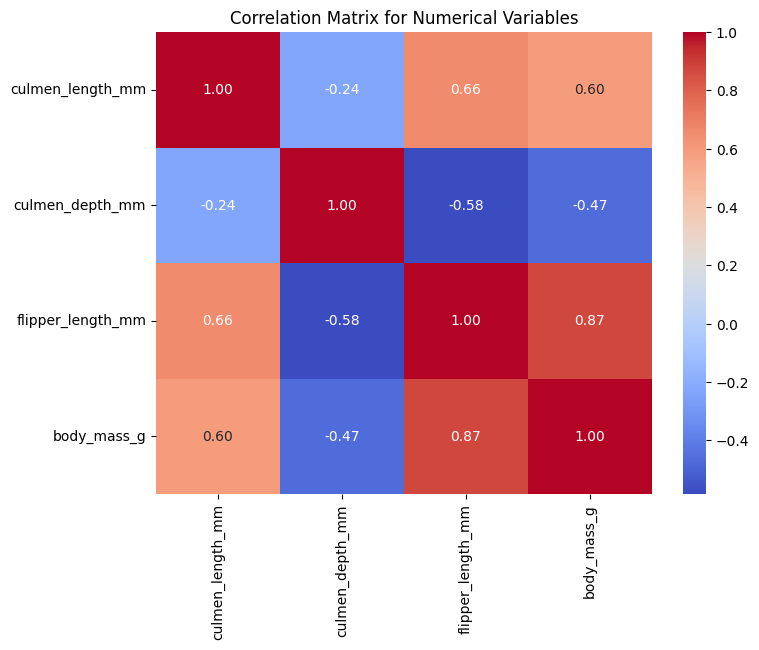

In [7]:
import seaborn as sns
numerical_vars=['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']
#Multivariate
correlation_matrix=df[numerical_vars].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm',fmt=".2f")
plt.title('Correlation Matrix for Numerical Variables')
plt.show()

In [10]:
#Task 4
import pandas as pd
numerical_vars=['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']
description_stats=df[numerical_vars].describe()
print(description_stats)

       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        342.000000       342.000000         342.000000   342.000000
mean          43.921930        17.151170         200.915205  4201.754386
std            5.459584         1.974793          14.061714   801.954536
min           32.100000        13.100000         172.000000  2700.000000
25%           39.225000        15.600000         190.000000  3550.000000
50%           44.450000        17.300000         197.000000  4050.000000
75%           48.500000        18.700000         213.000000  4750.000000
max           59.600000        21.500000         231.000000  6300.000000


In [11]:
#Task 5
import pandas as pd
import numpy as np
missing_values=df.isnull().sum()
columns_with_missing=missing_values[missing_values>0]
print("Columns with missing values:")
print(columns_with_missing)
df_cleaned=df.dropna()
df['culmen_length_mm'].fillna(df['culmen_length_mm'].mean(),inplace=True)
df['culmen_depth_mm'].fillna(df['culmen_depth_mm'].mean(),inplace=True)
df['flipper_length_mm'].fillna(df['flipper_length_mm'].mean(),inplace=True)
df['body_mass_g'].fillna(df['body_mass_g'].mean(), inplace=True)
remaining_missing = df.isnull().sum().sum()
print("\nRemaining missing values:",remaining_missing)

Columns with missing values:
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

Remaining missing values: 10


In [13]:
#Task 6
import pandas as pd
import numpy as np
from scipy import stats
numerical_vars=['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']
z_threshold=3
df_no_outliers=df.copy()
for var in numerical_vars:
  z_scores=np.abs(stats.zscore(df[var]))
  outliers=z_scores>z_threshold
  df_no_outliers[var][outliers]=np.nan
df_no_outliers_cleaned=df_no_outliers.dropna()
outliers_removed=df.shape[0]-df_no_outliers_cleaned.shape[0]
print("Number of outliers removed:",outliers_removed)

Number of outliers removed: 10


<ipython-input-13-33a4100021ba>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers[var][outliers]=np.nan


In [15]:
#Task 7
import pandas as pd
from scipy.stats import chi2_contingency
target_variable='species'
independent_variables=['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']
for var in independent_variables:
  contingency_table=pd.crosstab(df[target_variable],df[var])
  chi2,p,dof,expected=chi2_contingency(contingency_table)
  print(f"Chi-squared test results for {var}:")
  print(f"Chi-squared statistics: {chi2}")
  print(f"P-value: {p}")
  print()

Chi-squared test results for culmen_length_mm:
Chi-squared statistics: 470.5338593162223
P-value: 3.868884352428073e-07

Chi-squared test results for culmen_depth_mm:
Chi-squared statistics: 379.9739448241096
P-value: 6.137713516463007e-20

Chi-squared test results for flipper_length_mm:
Chi-squared statistics: 382.2373661501773
P-value: 9.294963538872332e-32

Chi-squared test results for body_mass_g:
Chi-squared statistics: 367.89770778147147
P-value: 9.265117412024159e-14



In [16]:
#Task 8
import pandas as pd
categorical_columns=['island','sex']
df_encoded = pd.get_dummies(df,columns=categorical_columns, drop_first=True)

In [17]:
#Task 9
import pandas as pd
independent_variables=['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']
dependent_variable='species'
X = df[independent_variables]
y=df[dependent_variable]

In [21]:
#Task 10
import pandas as pd
from sklearn.preprocessing import StandardScaler
independent_variables=['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']
X=df[independent_variables]
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [23]:
#Task 11
import pandas as pd
from sklearn.model_selection import train_test_split
independent_variables=['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']
dependent_variable='species'
X=df[independent_variables]
y=df[dependent_variable]
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [24]:
#Task 12
import numpy as np
print("Training data - Features shape:",X_train.shape)
print("Testing data - Features shape:",X_test.shape)
print("Training data - Target shape:",y_train.shape)
print("Testing data - Target shape:",y_test.shape)

Training data - Features shape: (275, 4)
Testing data - Features shape: (69, 4)
Training data - Target shape: (275,)
Testing data - Target shape: (69,)


In [25]:
#Accurancy predictions
#Accurancy values generation
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model=LogisticRegression(random_state=42)
model.fit(X_train_scaled,y_train)
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)
train_accuracy = accuracy_score(y_train,y_train_pred)
print("Training Accuracy:",train_accuracy)
test_accuracy = accuracy_score(y_test,y_test_pred)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.9890909090909091
Testing Accuracy: 0.9710144927536232
